In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
# The number of MTC Devices
nMTCD = 1000

# time of simulation 1 RAO = 10ms
simRAO = 1000
Backoff = 20

# probability of initiate RA generate by beta distribution
beta_prob = [0] * (simRAO + 1)
# accumulate probability
beta_prob_ac = [0] * (simRAO + 1)

beta_a = 3
beta_b = 4

# number of MTCD initiate RA in every system frame
nMTCD_RAO = [0] * (simRAO + 1)

In [5]:
# dataframe of result of RA Time related
RA_Time = pd.DataFrame(columns=['RA_init', 'RA_first', 'RA_success', 'RA_transmit'])

In [7]:
RA_Time.head()

,RA_init,RA_first,RA_success,RA_transmit


In [9]:
# generate beta distribution
for a in range(1, simRAO):
    beta_prob[a] = 60 * a**(beta_a-1) * (simRAO-a)**(beta_b-1) / simRAO**(beta_a+beta_b-1)
    beta_prob_ac[a] = beta_prob_ac[a-1] + beta_prob[a]

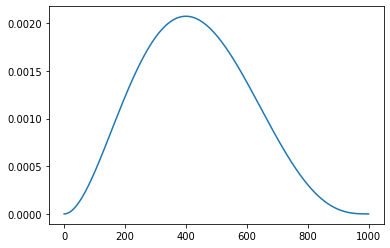

In [42]:
x = np.arange(1001)
plt.plot(x, beta_prob)

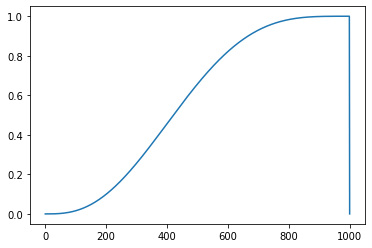

In [43]:
plt.plot(x, beta_prob_ac)

In [25]:
from scipy.stats import beta

In [28]:
a, b = 3, 4
rv = beta(a,b)

In [78]:
x = np.linspace(0,1,1000)

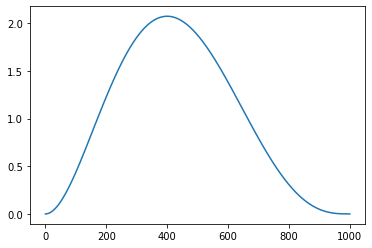

In [80]:
plt.plot(x * 1000, beta.pdf(x, a, b))

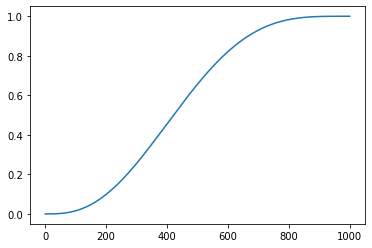

In [81]:
plt.plot(x * 1000, beta.cdf(x, a, b))

In [11]:
Traffic_Model_30k = pd.read_csv('/home/kangyu/TDCR/Traffic_Model/MTCD_RA_Time/MTCD_RA_Time_30000.csv')

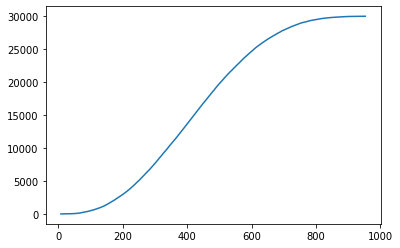

In [12]:
plt.plot(np.cumsum(Traffic_Model_30k.groupby('RA_init').size()))

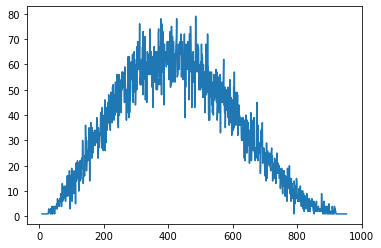

In [13]:
plt.plot(Traffic_Model_30k.groupby('RA_init').size())

In [5]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [24]:
# The number of MTC Devices
nMTCD = 10000

# time duration of simulation, 1 RAO = 10ms
simRAO = 1000

# dataframe of result of RA Time related
RA_Time = pd.DataFrame(
    columns=['RA_init', 'RA_first', 'RA_success', 'RA_transmit'])

# number of RA in every system frame
nMTCD_frame = np.zeros(simRAO)

# generate cdf of beta distribution
a = 3
b = 4
x = np.linspace(0, 1, simRAO)
beta_pdf = beta.pdf(x, a, b)
beta_cdf = beta.cdf(x, a, b)

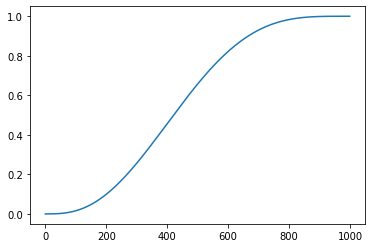

In [20]:
plt.plot(beta_cdf)

In [25]:
for device in range(nMTCD):
    p = random.random()
    for frame in range(simRAO):
        if p < beta_cdf[frame]:
            RA_Time.loc[device] = [frame, frame, -1, 0]
            nMTCD_frame[frame] += 1
            break

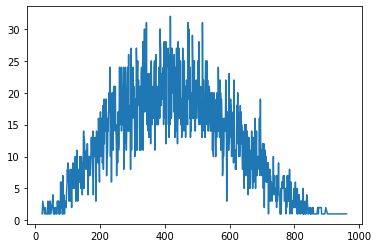

In [27]:
plt.plot(RA_Time.groupby('RA_init').size())

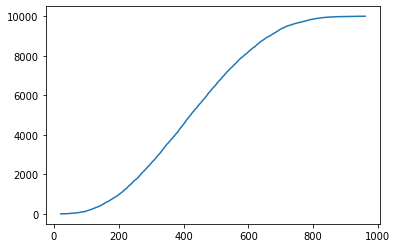

In [26]:
plt.plot(np.cumsum(RA_Time.groupby('RA_init').size()))